# Libraries and dataset

Using tensorflow 2.0.0 and mnist dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [18]:
from tensorflow.keras.datasets import mnist

# Looking into the data

In [19]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
y_train[0]

5

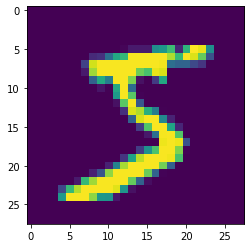

In [9]:
plt.imshow(X_train[0])

# Creating GAN

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Reshape,Flatten
from tensorflow.keras.models import Sequential

In [6]:
np.random.seed(42)
tf.random.set_seed(42)
codings_size = 100

In [7]:
generator = Sequential()
generator.add(Dense(100, activation="relu", input_shape=[codings_size]))
generator.add(Dense(150,activation='relu'))
generator.add(Dense(784, activation="sigmoid")) # 28*28 = 784
generator.add(Reshape([28,28]))

In [8]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(150,activation='relu'))
discriminator.add(Dense(100,activation='relu'))
discriminator.add(Dense(1,activation="sigmoid"))

discriminator.compile(loss="binary_crossentropy", optimizer="adam")

In [9]:
GAN = Sequential([generator, discriminator])

In [10]:
discriminator.trainable = False

In [11]:
GAN.compile(loss="binary_crossentropy", optimizer="adam")

In [12]:
GAN.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 28, 28)            143634    
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 132951    
Total params: 276,585
Trainable params: 143,634
Non-trainable params: 132,951
_________________________________________________________________


In [13]:
GAN.layers[0].summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 150)               15150     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               118384    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


In [14]:
GAN.layers[1].summary()

W0223 22:26:12.024759  2536 training.py:2090] Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 150)               117750    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 265,902
Trainable params: 132,951
Non-trainable params: 132,951
_________________________________________________________________


# Training

In [15]:
batch_size = 32

In [20]:
data_to_train = X_train

In [21]:
dataset = tf.data.Dataset.from_tensor_slices(data_to_train).shuffle(buffer_size=1000)

In [22]:
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [37]:
epochs=20

In [38]:
#Code from Hands-On book
generator, discriminator = GAN.layers

# For every epoch
for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")
    i = 0
    # For every batch in the dataset
    for X_batch in dataset:
        i=i+1
        if i%100 == 0:
            print(f"\tCurrently on batch number {i} of {len(data_to_train)//batch_size}")
        #####################################
        ## TRAINING THE DISCRIMINATOR ######
        ###################################
        
        # Create Noise
        noise = tf.random.normal(shape=[batch_size, codings_size])
        
        # Generate numbers based just on noise input
        gen_images = generator(noise)
        
        # Concatenate Generated Images against the Real Ones
        # TO use tf.concat, the data types must match!
        X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch,tf.float32)], axis=0)
        
        # Targets set to zero for fake images and 1 for real images
        y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
        
        # This gets rid of a Keras warning
        discriminator.trainable = True
        
        # Train the discriminator on this batch
        discriminator.train_on_batch(X_fake_vs_real, y1)
        
        
        #####################################
        ## TRAINING THE GENERATOR     ######
        ###################################
        
        # Create some noise
        noise = tf.random.normal(shape=[batch_size, codings_size])
        
        # We want discriminator to belive that fake images are real
        y2 = tf.constant([[1.]] * batch_size)
        
        # Avois a warning, weights are frozen so backpropagation only affects the weights of the generator
        discriminator.trainable = False
        
        GAN.train_on_batch(noise, y2)
        
print("TRAINING COMPLETE")            

Currently on Epoch 1
	Currently on batch number 100 of 1875
	Currently on batch number 200 of 1875
	Currently on batch number 300 of 1875
	Currently on batch number 400 of 1875
	Currently on batch number 500 of 1875
	Currently on batch number 600 of 1875
	Currently on batch number 700 of 1875
	Currently on batch number 800 of 1875
	Currently on batch number 900 of 1875
	Currently on batch number 1000 of 1875
	Currently on batch number 1100 of 1875
	Currently on batch number 1200 of 1875
	Currently on batch number 1300 of 1875
	Currently on batch number 1400 of 1875
	Currently on batch number 1500 of 1875
	Currently on batch number 1600 of 1875
	Currently on batch number 1700 of 1875
	Currently on batch number 1800 of 1875
Currently on Epoch 2
	Currently on batch number 100 of 1875
	Currently on batch number 200 of 1875
	Currently on batch number 300 of 1875
	Currently on batch number 400 of 1875
	Currently on batch number 500 of 1875
	Currently on batch number 600 of 1875
	Currently on

	Currently on batch number 400 of 1875
	Currently on batch number 500 of 1875
	Currently on batch number 600 of 1875
	Currently on batch number 700 of 1875
	Currently on batch number 800 of 1875
	Currently on batch number 900 of 1875
	Currently on batch number 1000 of 1875
	Currently on batch number 1100 of 1875
	Currently on batch number 1200 of 1875
	Currently on batch number 1300 of 1875
	Currently on batch number 1400 of 1875
	Currently on batch number 1500 of 1875
	Currently on batch number 1600 of 1875
	Currently on batch number 1700 of 1875
	Currently on batch number 1800 of 1875
Currently on Epoch 13
	Currently on batch number 100 of 1875
	Currently on batch number 200 of 1875
	Currently on batch number 300 of 1875
	Currently on batch number 400 of 1875
	Currently on batch number 500 of 1875
	Currently on batch number 600 of 1875
	Currently on batch number 700 of 1875
	Currently on batch number 800 of 1875
	Currently on batch number 900 of 1875
	Currently on batch number 1000 o

In [48]:
noise = tf.random.normal(shape=[1, codings_size])

In [49]:
noise.shape

TensorShape([1, 100])

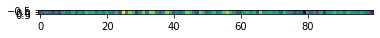

In [50]:
plt.imshow(noise)

In [51]:
image = generator(noise)

In [52]:
len(image)

1

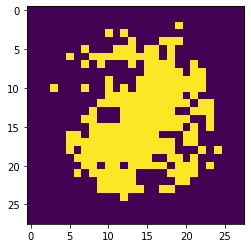

In [55]:
plt.imshow(image[0])

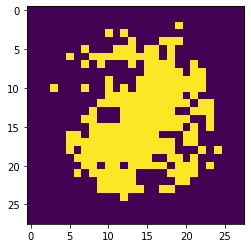

In [71]:
plt.imshow(generator(tf.random.normal(shape=[1,codings_size]))[0])

Generator creates everytime the same image. That is an example of mode collapse which model learnt to create only one image which will be enough to fool discriminator. 

To check if reason for this is small number of epochs the loop is going to work for hundreds epochs. To do this I will use google collab or kaggle resources for using gpu.

Another experiment is to check this code for Fashion MNIST